This file will find the sentiment scores of reivews from the restaurant Thick and Thin Treat Bar. It will then split the data from before and after Keith Lee posts a review on this restaurant, and creates 2 pie charts (one for before, one for after) to see the ratio of positive (sentiment scores >0) vs. negative reviews (sentiment scores <0).

When running on Colab, make sure the csv files for this restaurant (found in DATA/datasets) are accessible in the contents folder, or change the file path where needed.

Within this code, the script also gave the final dataset (has sentiment scores), which can be seen in DATA/final data analyzed.

In [1]:
# imports
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# downloading and preparing sentiment analyzer
nltk.download('vader_lexicon')
sentiment = SentimentIntensityAnalyzer()
# https://medium.com/@rslavanyageetha/vader-a-comprehensive-guide-to-sentiment-analysis-in-python-c4f1868b0d2e

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
#Thick and Thin: Before
TTBefore = pd.read_csv('/content/Thick and Think Treat Bar Before.csv')
TTBefore.head(3)

,Date,Review
0,30-Mar-23,Was super excited to try this place. There was...
1,23-Mar-23,"Great customer service and calm, clean environ..."
2,16-Mar-23,Found this place while driving by and decided ...


In [5]:
scores = []

for each in TTBefore['Review']:
  TTBeforeScores = sentiment.polarity_scores(each)
  scores.append(TTBeforeScores['compound'])

#print(scores)

TTBefore['SentimentScore'] = scores
TTBefore.head(4)

#export to csv
TTBefore.to_csv('ThicknThinBeforeWithScores.csv', index=False)

In [6]:
#counting the total number of pos values to compare to overall total number of reviews

totalPositiveScoresBefore = (TTBefore['SentimentScore']>0).sum()
print(totalPositiveScoresBefore)
#29

positiveRatioBefore = (TTBefore['SentimentScore']>0).mean()
print(positiveRatioBefore)
# so the positive review proportion here would be 29/30 or 0.9667


print(len(TTBefore))
#30

totalNegativeScoresBefore = (TTBefore['SentimentScore']<=0).sum()
print(totalNegativeScoresBefore)
#1


negativeRatioBefore = (TTBefore['SentimentScore']<=0).mean()
# proportion is 1/30 (negative) or 0.0333
print(negativeRatioBefore)

29
0.9666666666666667
30
1
0.03333333333333333


In [9]:
#Thick and Thin: After
TTAfter = pd.read_csv('/content/Thick and Thing Treat Bar After.csv')
TTAfter = TTAfter.filter(['Date','Review'], axis=1)
TTAfter.head(3)

,Date,Review
0,17-Sep-24,"Absolutely love Thick&Thin, I'm here on daily ..."
1,16-Sep-24,the watermelon juice refresher is sensational ...
2,16-Sep-24,I've been on a smoothie kick and the Watermelo...


In [10]:
TTAfter=TTAfter.dropna()
# TTAfter.head(-1)

In [14]:
scores2 = []

for each in TTAfter['Review']:
  TTAfterScores = sentiment.polarity_scores(each)
  scores2.append(TTAfterScores['compound'])

#print(scores2)

TTAfter['SentimentScore'] = scores2
TTAfter.head(4)

#export to csv
TTAfter.to_csv('ThicknThinAfterWithScores.csv', index=False)

In [12]:
#counting the total number of pos values to compare to overall total number of reviews

totalPositiveScoresAfter = (TTAfter['SentimentScore']>0).sum()
print(totalPositiveScoresAfter)
#58

positiveRatioAfter = (TTAfter['SentimentScore']>0).mean()
print(positiveRatioAfter)
# so the positive review proportion here would be 58/69 or 0.8406


print(len(TTAfter))
#69

totalNegativeScoresAfter = (TTAfter['SentimentScore']<=0).sum()
print(totalNegativeScoresAfter)
#11


negativeRatioAfter = (TTAfter['SentimentScore']<=0).mean()
# proportion is 11/69 (negative) or 0.30952
print(negativeRatioAfter)

58
0.8405797101449275
69
11
0.15942028985507245


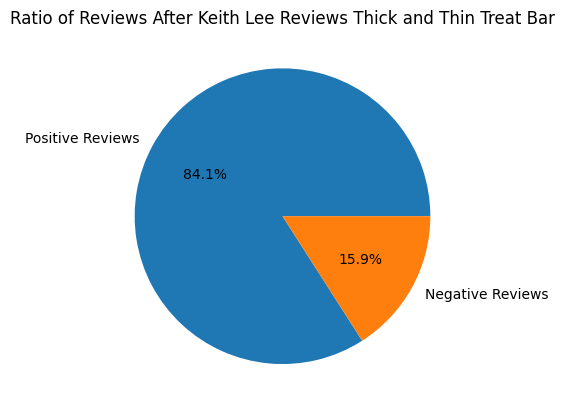

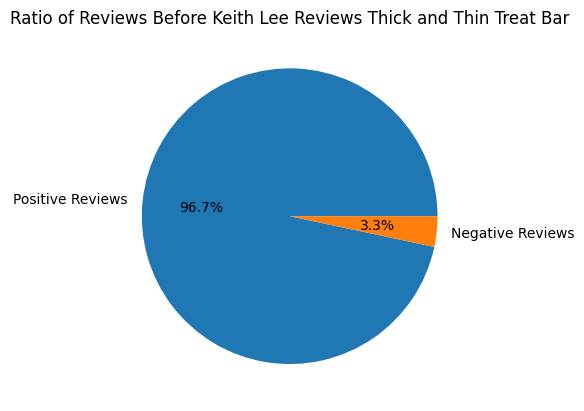

In [13]:
#making pie charts

#AFTER PIE CHART: THICK AND THIN
values = [positiveRatioAfter, negativeRatioAfter]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews After Keith Lee Reviews Thick and Thin Treat Bar')
plt.show()

#BEFORE PIE CHART: THICK AND THIN
values = [positiveRatioBefore, negativeRatioBefore]

plt.pie(values, labels=('Positive Reviews', 'Negative Reviews'), autopct='%1.1f%%')
plt.title('Ratio of Reviews Before Keith Lee Reviews Thick and Thin Treat Bar')
plt.show()